## test_mechanics.py

In [1]:
"""
test_mechanics.py connected to test_mechanics.ipynb 
via "jupytext" light pairing.

References:
===========    
    Books:
    ======    
    Douglas Cline, Variational Principles In Classical Mechanics
    Christopher W. Kulp, Vasilis Pagonis, Classical Mechanics A Computational Approach with Examples Using Mathematica and Python
    Gerald Jay Sussman, Jack Wisdom - Structure and Interpretation of Classical Mechanics, MIT Press (2014)
    
    Problem Books:
    ==============    
    Vladimir Pletser - Lagrangian and Hamiltonian Analytical Mechanics Forty Exercises Resolved and Explained-Springer Singapore (2018)
"""
import copy
import sys
import os
lstPaths = ["../src"]
for ipath in lstPaths:
    if ipath not in sys.path:
        sys.path.append(ipath)
from libsympy import *
from mechanics import *
from sympy.physics import mechanics as mech
mech.mechanics_printing() # for xdot printing etc.
#print(sys.version)
#print(sys.path)
# Execute jupyter-notebook related commands.
#exec(open('libnotebook.py').read())

libsympy is loaded.


### Settings

In [11]:
### Settings
class sets:
    """
    Setttings class.
        
    Instead of settings class, settings nametuble might be used.
    Settings = namedtuple("Settings", "type dropinf delta")
    sets = Settings(type="symbolic", dropinf=True, delta=0.1)
    """
    global dictflow, test_all
    
    def __init__(self):
        pass
    
    # File settings
    input_dir  = "input/mechanics"
    output_dir = "output/mechanics"
    
    # Plotting settings
    plot_time_scale = {1:"xy", 2:"xz", 3:"yz"}[3]
    
    # Execution settings.
    test_all = {0:False, 1:True}[1]
    dictflow = {100:"get_formulary", 150:"get_subformulary",
                200:"simple_harmonic_oscillator_scalar", 201:"simple_harmonic_oscillator_vectorial", 
                2321:"coordinate_systems",
                400:"double_pendulum1"}
    flow = [dictflow[i] for i in [400]]
    if test_all: flow = [dictflow[i] for i in dictflow.keys()]    
    #if test_all: flow = flatten([list(dictflow[i].values()) for i in dictflow.keys()])

In [12]:
print("Test of the {0}.".format(sets.flow))

Test of the ['get_formulary', 'get_subformulary', 'simple_harmonic_oscillator_scalar', 'simple_harmonic_oscillator_vectorial', 'coordinate_systems', 'double_pendulum1'].


### get_formulary

In [ ]:
### get_formulary
if "get_formulary" in sets.flow:
    omech.__init__(class_type = "scalar")
    omech.output_style = "latex"
    omech.get_formulary()
    omech.get_formulary(style="eq")
    
    omech.__init__(class_type = "vectorial")
    omech.get_formulary()    
    
    omech.__init__(class_type = "EulerLagrange")
    omech.get_formulary()    

    omech2 = mechanics()

### get_subformulary

In [ ]:
if "get_subformulary" in sets.flow:
    omech.__init__()
    omech.get_subformulary()

### simple_harmonic_oscillator_scalar

2.4.8.2 Harmonic Oscillator, p126.


'solve NewtonsLaw2 Derivative(x(t), (t, 2))'

solve(Eq(F, m*Derivative(x(t), (t, 2))), Derivative(x(t), (t, 2)))


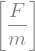

"Newton's 2nd Law"

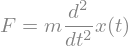

"Hooke's Law"

'Eq NewtonsLaw2 HookesLaw'

Equality(m*Derivative(x(t), (t, 2)), -k*x(t))


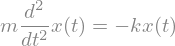

'Eq NewtonsLaw2 HookesLaw'

Equality(m*Derivative(x(t), (t, 2)), -k*x(t))


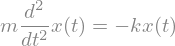

'subs omech.result [(k/m, w**2)]'

Eq(Derivative(x(t), (t, 2)), -k*x(t)/m)(subs, [(k/m, w**2)])


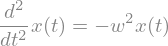

'dsolve omech.result x(t)'

dsolve(Eq(Derivative(x(t), (t, 2)), -w**2*x(t)), x(t))


Codes:
 Equality(m*Derivative(x(t), (t, 2)), -k*x(t))
 Equality(m*Derivative(x(t), (t, 2)), -k*x(t))
 Eq(Derivative(x(t), (t, 2)), -k*x(t)/m)(subs, [(k/m, w**2)])
 dsolve(Eq(Derivative(x(t), (t, 2)), -w**2*x(t)), x(t))



'dsolve omech.result x(t)'

dsolve(Eq(x(t), C1*sin(t*w) + C2*cos(t*w)), x(t))


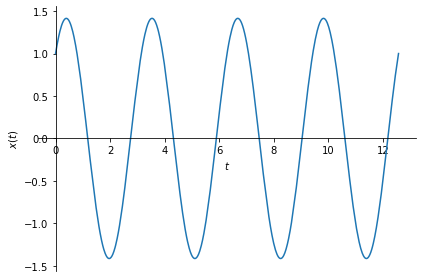

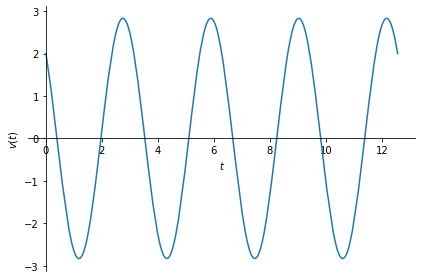

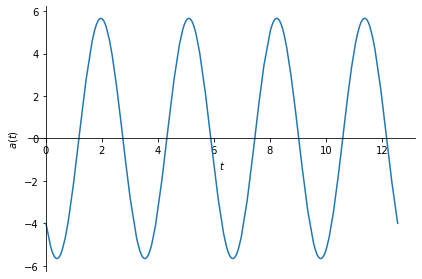

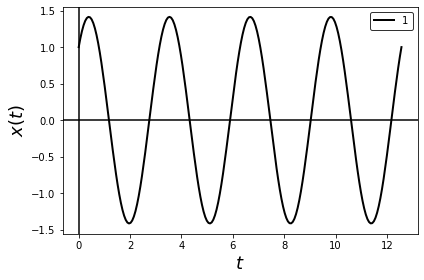

In [4]:
if "simple_harmonic_oscillator_scalar" in sets.flow:
    """       
    Example: Solve a from F = ma
    """
#    omech = mechanics() # DO NOT create any instance.
    print("2.4.8.2 Harmonic Oscillator, p126.")
    omech.__init__(class_type = "scalar")
    omech.verbose = True
    commands = ["solve", "NewtonsLaw2", omech.a.rhs]
    omech.process(commands)

    """
    Example: Solve position of a spring mass system.
    F = ma, F = -kx
    -kx = ma
    -kx = m d^2 x/dt^2
    w = sqrt(k/m)
    x(t) = C1*sin(wt) + C2*sin(wt)
    """
    # Scalar Way.
    omech.__init__(class_type = "scalar")
    omech.verbose = True
    display("Newton's 2nd Law", omech.NewtonsLaw2, 
            "Hooke's Law", omech.HookesLaw)
    
    commands = ["Eq", "NewtonsLaw2", "HookesLaw"]
    omech.process(commands)
#    commands = ["subs", "omech.result", [(a, diff(x, t, 2, evaluate=False))]]
    res = omech.process(commands)
    omech.result = Eq(simplify(res.lhs/m), simplify(res.rhs/m)) 
    commands = ["subs", "omech.result", [(k/m, w**2)]]
    omech.process(commands)
#    omech.result = Eq(omech.result.lhs.coeff(C.i), omech.result.rhs)
    commands = ["dsolve", "omech.result", omech.x]
    omech.process(commands)
    print("Codes:\n", *omech.get_codes())
       
    omech.x = omech.process(commands).rhs
    v = omech.v.evalf(subs={x:omech.x}).doit()
    a = omech.a.evalf(subs={x:omech.x}).doit()
    T = omech.T.evalf(subs={x:omech.x}).doit()
    U = omech.U.evalf(subs={x:omech.x}).doit()
    display(omech.result,v,a,T,U)
    
    # Numerical calculations
    [C1,C2] = symbols('C1 C2')
    numvals = {C1:1, C2:1, w:2}
#    commands = ["xreplace", "omech.x", numvals]
#    omech.process(commands)
    x = omech.x.evalf(subs=numvals).doit()
    v = v.evalf(subs=numvals).rhs
    a = a.evalf(subs=numvals).rhs
    plot(x, (t,0,4*pi,200), xlabel="$t$", ylabel="$x(t)$")
    plot(v, (t,0,4*pi,200), xlabel="$t$", ylabel="$v(t)$")
    plot(a, (t,0,4*pi,200), xlabel="$t$", ylabel="$a(t)$")
    plot_sympfunc([x.subs({t:var('x')}),], (0, float(4*pi), 200), 
                   xlabel="$t$", ylabel="$x(t)$")

### simple_harmonic_oscillator_vectorial     

'Eq NewtonsLaw2 HookesLaw'

Equality((m*Derivative(x(t), (t, 2)))*C.i + (m*Derivative(y(t), (t, 2)))*C.j + (m*Derivative(z(t), (t, 2)))*C.k, -k*x(t))


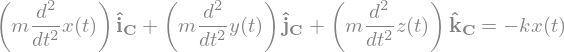

'subs omech.result [(k/m, w**2)]'

Eq((Derivative(x(t), (t, 2)))*C.i + (Derivative(y(t), (t, 2)))*C.j + (Derivative(z(t), (t, 2)))*C.k, -k*x(t)/m)(subs, [(k/m, w**2)])


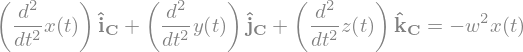

'dsolve omech.result x(t)'

dsolve(Eq(Derivative(x(t), (t, 2)), -w**2*x(t)), x(t))


Codes:
 Equality((m*Derivative(x(t), (t, 2)))*C.i + (m*Derivative(y(t), (t, 2)))*C.j + (m*Derivative(z(t), (t, 2)))*C.k, -k*x(t))
 Eq((Derivative(x(t), (t, 2)))*C.i + (Derivative(y(t), (t, 2)))*C.j + (Derivative(z(t), (t, 2)))*C.k, -k*x(t)/m)(subs, [(k/m, w**2)])
 dsolve(Eq(Derivative(x(t), (t, 2)), -w**2*x(t)), x(t))



'dsolve omech.result x(t)'

dsolve(Eq(x(t), C1*sin(t*w) + C2*cos(t*w)), x(t))


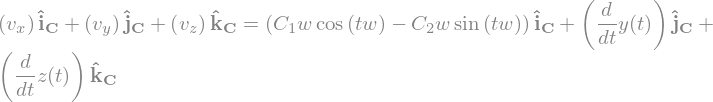

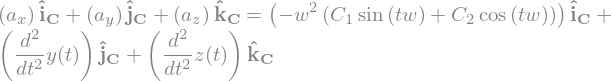

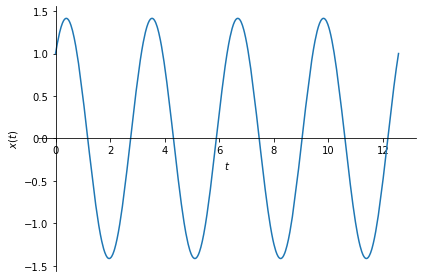

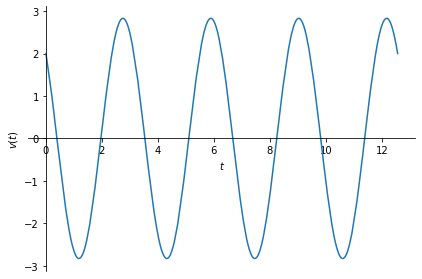

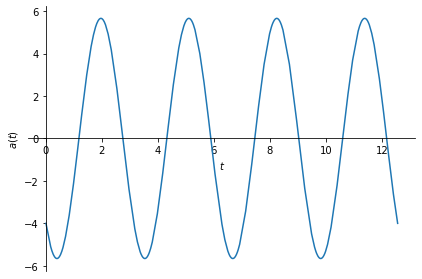

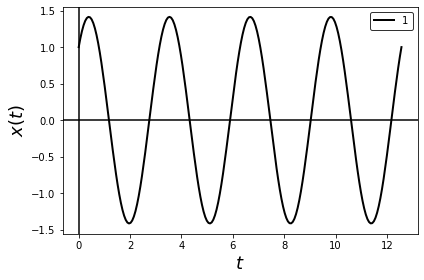

In [3]:
if "simple_harmonic_oscillator_vectorial" in sets.flow:
    # Vectorial Way.
    omech.__init__(class_type = "vectorial")
    omech.verbose = True
    
    commands = ["Eq", "NewtonsLaw2", "HookesLaw"]
#    commands = ["subs", "omech.result", [(a, diff(x, t, 2, evaluate=False))]]
    res = omech.process(commands)
    omech.result = Eq(simplify(res.lhs/m), simplify(res.rhs/m)) 
    commands = ["subs", "omech.result", [(k/m, w**2)]]
    omech.process(commands)
    omech.result = Eq(omech.result.lhs.coeff(C.i), omech.result.rhs)
    commands = ["dsolve", "omech.result", omech.x]
    omech.process(commands)
    print("Codes:\n", *omech.get_codes())
    
    omech.x = omech.process(commands).rhs
    v = omech.v.evalf(subs={x:omech.x}).doit()
    a = omech.a.evalf(subs={x:omech.x}).doit()
    display(omech.result,v,a)
    
    # Numerical calculations
    [C1,C2] = symbols('C1 C2')
    numvals = {C1:1, C2:1, w:2}
#    commands = ["xreplace", "omech.x", numvals]
#    omech.process(commands)
    x = omech.x.evalf(subs=numvals).doit()
    v = v.evalf(subs=numvals).rhs.components[C.i]
    a = a.evalf(subs=numvals).rhs.components[C.i]
    plot(x, (t,0,4*pi,200), xlabel="$t$", ylabel="$x(t)$")
    plot(v, (t,0,4*pi,200), xlabel="$t$", ylabel="$v(t)$")
    plot(a, (t,0,4*pi,200), xlabel="$t$", ylabel="$a(t)$")
    plot_sympfunc([x.subs({t:var('x')}),], (0, float(4*pi), 200), 
                   xlabel="$t$", ylabel="$x(t)$")

### coordinate_systems    

Coordinate Systems
Polar Coordinates


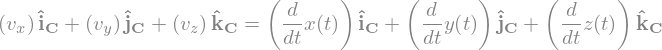

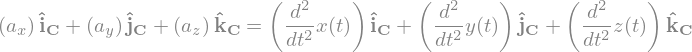

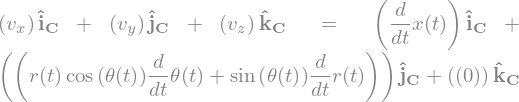

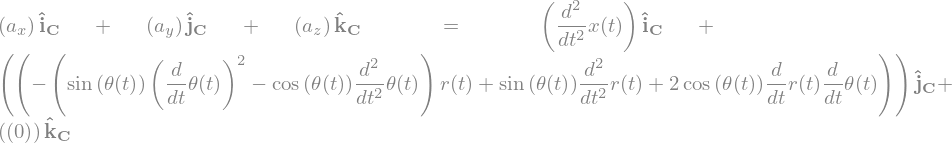

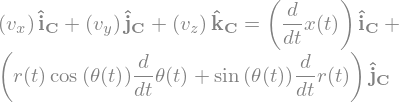

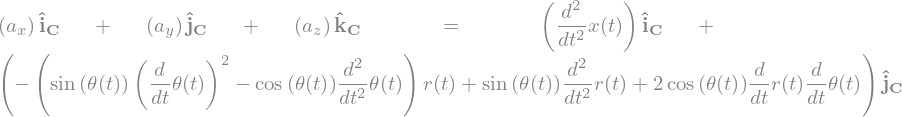

Components of r


Components of v


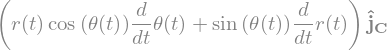

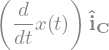

Components of a


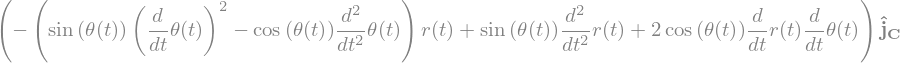

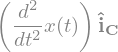

In [4]:
if "coordinate_systems" in sets.flow:
    print("Coordinate Systems")
    
    print("Polar Coordinates")
    omech.__init__(class_type = "vectorial")
    omech.verbose = False
    
    xreplaces = {x:r*cos(theta)*C.i,
                  y:r*sin(theta)*C.j,
                  z:0}
    xreplaces = {x:omech.subformulary.pol_to_cart_x,
                 y:omech.subformulary.pol_to_cart_y,
                 z:0} # C.k
    display(omech.r, omech.v, omech.a)
    display(xreplaces)

    commands = ["xreplace", "omech.r", xreplaces]
    r = omech.process(commands).doit()
    commands = ["xreplace", "omech.v", xreplaces]
    v = omech.process(commands).doit()
    commands = ["xreplace", "omech.a", xreplaces]
    a = omech.process(commands).doit()
    display(x,y,z,r,v,a)
    
    print("Components of r")
    [display(r.rhs.args[i]) for i in range(2)]
    print("Components of v")
    [display(v.rhs.args[i]) for i in range(2)]
    print("Components of a")
    [display(a.rhs.args[i]) for i in range(2)]

### Double Pendulum

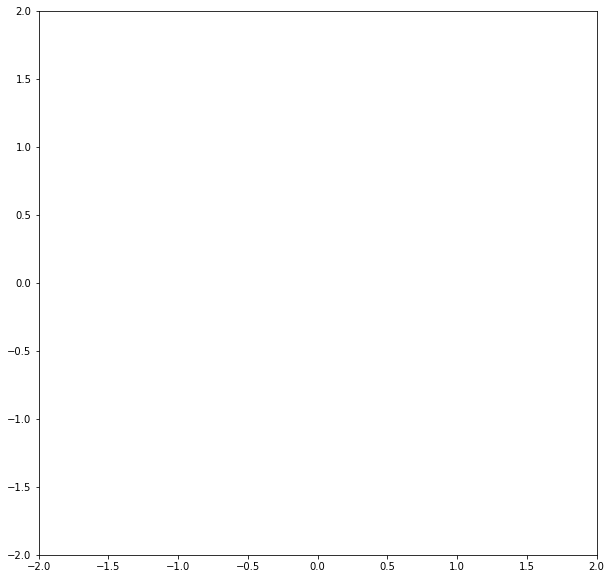

In [5]:
# ----> double_pendulum1 chatgpt GPT-4
if "double_pendulum1" in sets.flow:
    """
    chatgpt GPT-4
    """
    import sympy as sp
    import numpy as np
    from scipy.integrate import odeint
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation
    import time
    
    # Symbols
    t = sp.symbols('t')
    m1, m2, l1, l2, g = sp.symbols('m1 m2 l1 l2 g')
    theta1 = sp.Function('theta1')(t)
    theta2 = sp.Function('theta2')(t)
    
    # Coordinates and velocities
    theta1_dot = sp.diff(theta1, t)
    theta2_dot = sp.diff(theta2, t)
    
    # Positions of masses
    x1 = l1 * sp.sin(theta1)
    y1 = -l1 * sp.cos(theta1)
    x2 = x1 + l2 * sp.sin(theta2)
    y2 = y1 - l2 * sp.cos(theta2)
    
    # Kinetic Energy
    T1 = (1/2) * m1 * (sp.diff(x1, t)**2 + sp.diff(y1, t)**2)
    T2 = (1/2) * m2 * (sp.diff(x2, t)**2 + sp.diff(y2, t)**2)
    T = T1 + T2
    
    # Potential Energy
    V1 = m1 * g * y1
    V2 = m2 * g * y2
    V = V1 + V2
    
    # Lagrangian
    L = T - V
    
    # Lagrange's equations
    LE1 = sp.diff(sp.diff(L, theta1_dot), t) - sp.diff(L, theta1)
    LE2 = sp.diff(sp.diff(L, theta2_dot), t) - sp.diff(L, theta2)
    
    # Simplify equations
    LE1 = sp.simplify(LE1)
    LE2 = sp.simplify(LE2)
    
    # Convert to first-order system
    theta1_ddot, theta2_ddot = sp.symbols('theta1_ddot theta2_ddot')
    LE1 = LE1.subs({
        sp.diff(theta1, t, t): theta1_ddot,
        sp.diff(theta2, t, t): theta2_ddot
    })
    LE2 = LE2.subs({
        sp.diff(theta1, t, t): theta1_ddot,
        sp.diff(theta2, t, t): theta2_ddot
    })
    
    sol = sp.solve([LE1, LE2], (theta1_ddot, theta2_ddot))
    theta1_ddot_expr = sol[theta1_ddot]
    theta2_ddot_expr = sol[theta2_ddot]
    
    # Convert to lambda functions for numerical integration
    theta1_ddot_func = sp.lambdify((theta1, theta1_dot, theta2, theta2_dot, m1, m2, l1, l2, g), theta1_ddot_expr)
    theta2_ddot_func = sp.lambdify((theta1, theta1_dot, theta2, theta2_dot, m1, m2, l1, l2, g), theta2_ddot_expr)
    
    def derivs(state, t, m1, m2, l1, l2, g):
        theta1, theta1_dot, theta2, theta2_dot = state
        theta1_ddot = theta1_ddot_func(theta1, theta1_dot, theta2, theta2_dot, m1, m2, l1, l2, g)
        theta2_ddot = theta2_ddot_func(theta1, theta1_dot, theta2, theta2_dot, m1, m2, l1, l2, g)
        return [theta1_dot, theta1_ddot, theta2_dot, theta2_ddot]
    
    # Initial conditions and parameters
    initial_state = [np.pi / 2, 0, np.pi / 2, 0]  # [theta1, theta1_dot, theta2, theta2_dot]
    params = (1.0, 1.0, 1.0, 1.0, 9.81)  # (m1, m2, l1, l2, g)
    t = np.linspace(0, 20, 1000)  # time array
    
    # Numerical integration
    solution = odeint(derivs, initial_state, t, args=params)
    
    # Extract results
    theta1_sol, theta2_sol = solution[:, 0], solution[:, 2]
    
    # Convert to Cartesian coordinates for plotting
    x1_sol = params[2] * np.sin(theta1_sol)
    y1_sol = -params[2] * np.cos(theta1_sol)
    x2_sol = x1_sol + params[3] * np.sin(theta2_sol)
    y2_sol = y1_sol - params[3] * np.cos(theta2_sol)
    
    # Set up the figure, the axis, and the plot elements
    fig, ax = plt.subplots(figsize=(10, 10))  # Increase figure size for better readability
    ax.set_xlim((-2, 2))
    ax.set_ylim((-2, 2))
    
    line, = ax.plot([], [], 'o-', lw=2)
    time_template = 'Time = %.1f s'
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes, fontsize=14)  # Increase font size
    
    # Initialize real time
    start_time = time.time()
    
    def init():
        line.set_data([], [])
        time_text.set_text('')
        return line, time_text
    
    def update(i):
        elapsed_time = time.time() - start_time
        thisx = [0, x1_sol[i], x2_sol[i]]
        thisy = [0, y1_sol[i], y2_sol[i]]
        line.set_data(thisx, thisy)
        time_text.set_text(time_template % elapsed_time)
        return line, time_text
    
    ani = animation.FuncAnimation(fig, update, frames=range(len(t)),
                                  init_func=init, blit=True, interval=20)
    
    plt.show()